In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

## Load Dataset

In [3]:
df =pd.read_csv('data/data.csv')
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,Instructions,Discount construct,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",NaN,40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",NaN,Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",NaN,40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",NaN,40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


### Data Cleaning 

In [4]:
df["Items in order"].value_counts()

Items in order
1 x Bageecha Pizza                                                                                                                                  877
1 x Bone in Jamaican Grilled Chicken                                                                                                                594
1 x All About Chicken Pizza                                                                                                                         449
1 x Margherita Pizza                                                                                                                                408
1 x Makhani Paneer Pizza                                                                                                                            353
                                                                                                                                                   ... 
1 x Bone in Peri Peri Grilled Chicken, 2 x Bone in Jamaican Grilled Chick

In [5]:
import re

# Function to expand an order line into list of items
def expand_items(order_str):
    parts = re.findall(r"(\d+)\s*x\s*([^,]+)", order_str)
    items = []
    for qty, name in parts:
        item_name = name.strip()
        items.extend([item_name] * int(qty))
    return items

# Apply the expansion to each row
df["expanded_items"] = df["Items in order"].apply(expand_items)

# Create a global list (flattened)
all_items = [item for sublist in df["expanded_items"] for item in sublist]

# Create a unique global item map
unique_items = sorted(set(all_items))
item_map = {f"item_{i+1}": name for i, name in enumerate(unique_items)}

print(df[["Items in order", "expanded_items"]])
print("\nGlobal item map:")
print(item_map)

                                          Items in order  \
0      1 x Grilled Chicken Jamaican Tender, 1 x Grill...   
1      1 x Peri Peri Fries, 1 x Fried Chicken Angara ...   
2                  1 x Bone in Peri Peri Grilled Chicken   
3      1 x Fried Chicken Ghostbuster Tender, 1 x Anga...   
4      1 x Peri Peri Krispers, 1 x Fried Chicken Anga...   
...                                                  ...   
21316      1 x Fried Chicken Desi Peri Peri Bites (Bone)   
21317         1 x Fried Chicken 65 Masala Boneless Bites   
21318                    1 x Korean Fried Chicken Slider   
21319                                1 x Ooh Saucy Fries   
21320                1 x Grilled Chicken Jamaican Slider   

                                          expanded_items  
0      [Grilled Chicken Jamaican Tender, Grilled Chic...  
1      [Peri Peri Fries, Fried Chicken Angara Tender,...  
2                    [Bone in Peri Peri Grilled Chicken]  
3      [Fried Chicken Ghostbuster Tender, A

In [6]:
import matplotlib.pyplot as plt

# --- Step 3: Count frequencies ---
item_counts = pd.Series(all_items).value_counts().reset_index()
item_counts.columns = ["Item", "Order Frequency"]

# --- Step 4: Print the full list sorted by frequency ---
print("=== Full Item Order Frequency List ===\n")
print(item_counts.to_string(index=False))

=== Full Item Order Frequency List ===

                                                  Item  Order Frequency
                                        Bageecha Pizza             3334
                            Chilli Cheese Garlic Bread             1932
                      Bone in Jamaican Grilled Chicken             1770
                               All About Chicken Pizza             1728
                                  Makhani Paneer Pizza             1524
                                      Margherita Pizza             1477
                                   Cheesy Garlic Bread             1336
                                 Jamaican Chicken Melt             1223
                                         Herbed Potato              980
                                  Tripple Cheese Pizza              959
                           Murgh Amritsari Seekh Pizza              877
                     Bone in Smoky Bbq Grilled Chicken              804
                        

## Exploratory Data Analysis

Check class imbalance
Countplot
Distribution plot
Boxplot
Scatter plot
Correlation Matrix
Predictive Power Score

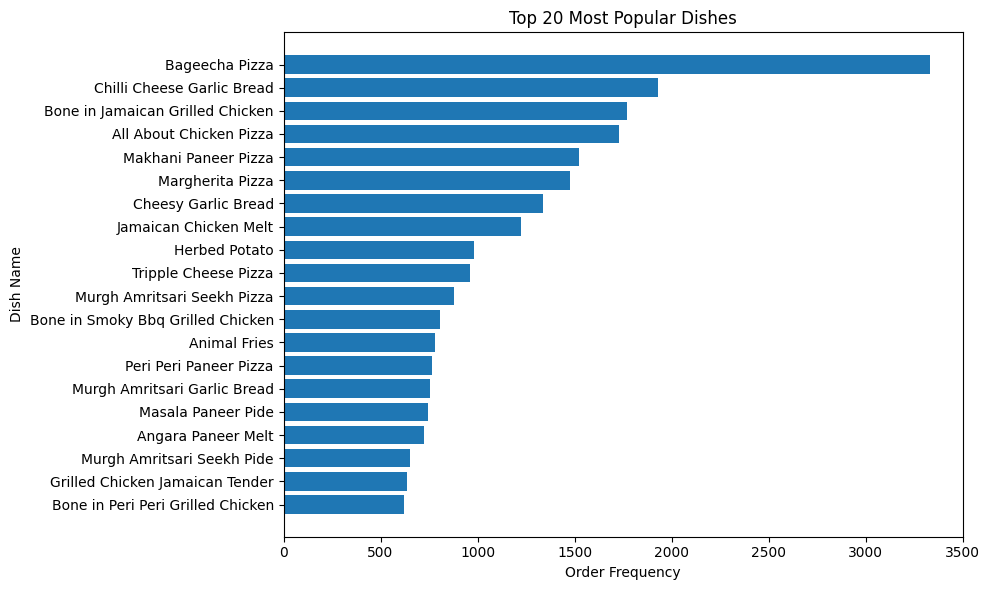

In [7]:
# --- Step 5: Plot top 20 items ---
plt.figure(figsize=(10,6))
plt.barh(item_counts["Item"].head(20)[::-1], item_counts["Order Frequency"].head(20)[::-1])
plt.title("Top 20 Most Popular Dishes")
plt.xlabel("Order Frequency")
plt.ylabel("Dish Name")
plt.tight_layout()
plt.show()

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID', 'expanded_items'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Restaurant ID                                       21321 non-null  int64  
 1   Restaurant name                                     21321 non-null  object 
 2   Subzone                                             21321 non-null  object 
 3   City                                                21321 non-null  object 
 4   Order ID                                            21321 non-null  int64  
 5   Order Placed At                                     21321 non-null  object 
 6   Order Status                                        21321 non-null  object 
 7   Delivery                                            21321 non-null  object 
 8   Distance                                            21321 non-null  object 


In [10]:
# get all unique day from order date
df["Order Placed At"].nunique()

19114

In [11]:
df["Subzone"].value_counts()

Subzone
Greater Kailash 2 (GK2)    7380
Sector 4                   6530
DLF Phase 1                3686
Sector 135                 2442
Vasant Kunj                 920
Shahdara                    360
Chittaranjan Park             2
Sikandarpur                   1
Name: count, dtype: int64

In [12]:
df["Restaurant name"].value_counts()

Restaurant name
Aura Pizzas             14548
Swaad                    6332
Dilli Burger Adda         227
Tandoori Junction         154
The Chicken Junction       32
Masala Junction            28
Name: count, dtype: int64

In [13]:
# Convert "Order Placed At" to datetime
df["Order_Datetime"] = pd.to_datetime(df["Order Placed At"], format="%I:%M %p, %B %d %Y")

In [14]:
# Get unique values in city and subzone
unique_cities = df["City"].unique()
unique_subzones = df["Subzone"].unique()
unique_cities, unique_subzones

(array(['Delhi NCR'], dtype=object),
 array(['Sector 4', 'Greater Kailash 2 (GK2)', 'DLF Phase 1', 'Sector 135',
        'Vasant Kunj', 'Shahdara', 'Sikandarpur', 'Chittaranjan Park'],
       dtype=object))

In [15]:
import numpy as np
import plotly.graph_objects as go

# Step 1: Restaurant coordinates (approximate)
restaurant_coords = {
    "Aura Pizzas": [28.5866, 77.2230],
    "Swaad": [28.5734, 77.2581],
    "Dilli Burger Adda": [28.6620, 77.2365],
    "Tandoori Junction": [28.6098, 77.0923],
    "The Chicken Junction": [28.6412, 77.2163],
    "Masala Junction": [28.5309, 77.1466]
}

# Map lat/lon to df
df['rest_lat'] = df['Restaurant name'].map(lambda x: restaurant_coords.get(x, [None, None])[0])
df['rest_lon'] = df['Restaurant name'].map(lambda x: restaurant_coords.get(x, [None, None])[1])

# Step 2: Convert Distance to float, handle <1 as 0.9
def clean_distance(d):
    if pd.isna(d):
        return np.nan
    d = d.replace('km','').strip()
    if d.startswith('<'):
        return 0.9  # assign 0.9 km for "<1"
    try:
        return float(d)
    except:
        return np.nan

df['Distance_km'] = df['Distance'].apply(clean_distance)

# Step 3: Aggregate average and max distances per restaurant
dist_stats = df.groupby('Restaurant name')['Distance_km'].agg(['mean','max']).reset_index()

# Step 4: Aggregate order counts per Subzone
orders_per_subzone = df.groupby('Subzone').size().reset_index(name='Orders')

# Approximate subzone centers
subzone_coords = {
    'Greater Kailash 2 (GK2)': [28.5416, 77.2437],
    'Sector 4': [28.5900, 77.4000],
    'DLF Phase 1': [28.4590, 77.0300],
    'Sector 135': [28.5700, 77.3600],
    'Vasant Kunj': [28.5300, 77.1500]
}
orders_per_subzone['lat'] = orders_per_subzone['Subzone'].map(lambda x: subzone_coords.get(x, [None, None])[0])
orders_per_subzone['lon'] = orders_per_subzone['Subzone'].map(lambda x: subzone_coords.get(x, [None, None])[1])

# Step 5: Create map
fig = go.Figure()

# Add restaurants
for _, row in dist_stats.iterrows():
    rest_name = row['Restaurant name']
    lat, lon = restaurant_coords[rest_name]
    fig.add_trace(go.Scattermapbox(
        lat=[lat],
        lon=[lon],
        mode='markers',
        marker=go.scattermapbox.Marker(size=10, color='blue'),
        name=rest_name,
        hovertemplate=(
            f"{rest_name}<br>"
            f"Avg dist: {row['mean']:.2f} km<br>"
            f"Max dist: {row['max']:.2f} km"
        )
    ))
    
    # Add avg and max distance circles
    for dist, color, label in zip([row['mean'], row['max']], ['orange','red'], ['Avg','Max']):
        fig.add_trace(go.Scattermapbox(
            lat=[lat],
            lon=[lon],
            mode='markers',
            marker=go.scattermapbox.Marker(
                size=dist*10,  # scale factor for visibility
                color=color,
                opacity=0.2
            ),
            name=f"{rest_name} {label} Distance",
            showlegend=False
        ))

# Add subzone order counts
fig.add_trace(go.Scattermapbox(
    lat=orders_per_subzone['lat'],
    lon=orders_per_subzone['lon'],
    mode='markers',
    marker=go.scattermapbox.Marker(size=orders_per_subzone['Orders'], color='red', sizemode='area'),
    text=orders_per_subzone['Subzone'] + ': ' + orders_per_subzone['Orders'].astype(str) + ' orders',
    name='Orders per Subzone'
))

# Layout
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=11,
    mapbox_center={"lat":28.6139, "lon":77.2090},
    margin={"r":0,"t":0,"l":0,"b":0},
)

fig.show()


/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_53709/1976887965.py:56: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_53709/1976887965.py:71: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_53709/1976887965.py:85: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [16]:
import random

# --- Example restaurant_coords and subzone_coords (use your actual data) ---
restaurant_coords = {
    'Aura Pizzas': [28.55, 77.25],
    'Swaad': [28.59, 77.36],
    'Dilli Burger Adda': [28.50, 77.20],
    'Tandoori Junction': [28.53, 77.15],
    'The Chicken Junction': [28.52, 77.21],
    'Masala Junction': [28.57, 77.35]
}

subzone_coords = {
    'Greater Kailash 2 (GK2)': [28.5416, 77.2437],
    'Sector 4': [28.5900, 77.4000],
    'DLF Phase 1': [28.4590, 77.0300],
    'Sector 135': [28.5700, 77.3600],
    'Vasant Kunj': [28.5300, 77.1500],
    'Shahdara': [28.6667, 77.2700],
    'Chittaranjan Park': [28.5530, 77.2580],
    'Sikandarpur': [28.4970, 77.0830]
}

# --- Your DataFrame `df` is already loaded ---
# Step 1: clean Distance column
df['Distance_km'] = df['Distance'].str.replace(r'\s*km','', regex=True)
df['Distance_km'] = df['Distance_km'].replace('<1', '0.9').astype(float)

# Step 2: aggregate delivery counts
delivery_counts = df.groupby(['Restaurant name','Subzone']).size().reset_index(name='count')

# Step 3: Prepare hover text for restaurants
restaurant_hover = {}
for rest in df['Restaurant name'].unique():
    deliveries = delivery_counts[delivery_counts['Restaurant name']==rest]
    hover_text = f"{rest}<br>Deliveries to sectors:<br>"
    for _, row in deliveries.iterrows():
        hover_text += f"{row['Subzone']}: {row['count']}<br>"
    restaurant_hover[rest] = hover_text

# Step 4: Prepare hover text for subzones
subzone_hover = {}
for sub in df['Subzone'].unique():
    deliveries = delivery_counts[delivery_counts['Subzone']==sub]
    hover_text = f"{sub}<br>Deliveries from restaurants:<br>"
    for _, row in deliveries.iterrows():
        hover_text += f"{row['Restaurant name']}: {row['count']}<br>"
    subzone_hover[sub] = hover_text

# --- Function to slightly jitter overlapping markers ---
def jitter(lat, lon, scale=0.0005):
    return lat + random.uniform(-scale, scale), lon + random.uniform(-scale, scale)

# Step 5: Plot
fig = go.Figure()

# Lines (constant thickness)
for _, row in delivery_counts.iterrows():
    r = row['Restaurant name']
    s = row['Subzone']
    fig.add_trace(go.Scattermapbox(
        lat=[restaurant_coords[r][0], subzone_coords[s][0]],
        lon=[restaurant_coords[r][1], subzone_coords[s][1]],
        mode='lines',
        line=go.scattermapbox.Line(width=4, color='green'),
        hoverinfo='none',
        showlegend=False
    ))

# Subzones (keep bigger for clarity)
for sub in subzone_coords:
    fig.add_trace(go.Scattermapbox(
        lat=[subzone_coords[sub][0]],
        lon=[subzone_coords[sub][1]],
        mode='markers',
        marker=go.scattermapbox.Marker(size=36, color='blue', opacity=0.7),
        name=sub,
        hoverinfo='text',
        hovertext=subzone_hover.get(sub, sub)
    ))

# Restaurants with jitter
for rest in restaurant_coords:
    lat, lon = jitter(restaurant_coords[rest][0], restaurant_coords[rest][1])
    fig.add_trace(go.Scattermapbox(
        lat=[lat],
        lon=[lon],
        mode='markers',
        marker=go.scattermapbox.Marker(size=12, color='red'),
        name=rest,
        hoverinfo='text',
        hovertext=restaurant_hover.get(rest, rest)
    ))

# Layout
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=11,
    mapbox_center={"lat":28.6139, "lon":77.2090},
    margin={"r":0,"t":0,"l":0,"b":0},
    legend=dict(font=dict(size=10)),
    height=900,
    width=1600
)

fig.show()


/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_53709/415630738.py:61: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_53709/415630738.py:72: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_53709/415630738.py:85: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [17]:
df.shape

(21321, 34)

## Feature Engineering

### Removing Unwanted Columns 

In [18]:
print(df.columns.tolist())

# Strip spaces from all column names
df.columns = df.columns.str.strip()
# List of post-order columns to drop
post_order_cols = [
    'Bill subtotal', 'Packaging charges', 'Restaurant discount (Promo)',
    'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
    'Brand pack discount', 'Total', 'Rating', 'Review',
    'Cancellation / Rejection reason', 'Restaurant compensation (Cancellation)',
    'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
    'Rider wait time (minutes)', 'Order Ready Marked', 'Customer complaint tag'
]

# Drop the columns if they exist in the DataFrame
df = df.drop(columns=[col for col in post_order_cols if col in df.columns])

# Check remaining columns
print(df.columns)

['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID', 'Order Placed At', 'Order Status', 'Delivery', 'Distance', 'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal', 'Packaging charges', 'Restaurant discount (Promo)', 'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount', 'Brand pack discount', 'Total', 'Rating', 'Review', 'Cancellation / Rejection reason', 'Restaurant compensation (Cancellation)', 'Restaurant penalty (Rejection)', 'KPT duration (minutes)', 'Rider wait time (minutes)', 'Order Ready Marked', 'Customer complaint tag', 'Customer ID', 'expanded_items', 'Order_Datetime', 'rest_lat', 'rest_lon', 'Distance_km']
Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Customer ID',
       'expanded_items', 'Order_Datetime', 'rest_lat', 'rest_lon',
       'Distance_km'],
      dtype='

In [19]:
df["hour"] = df["Order_Datetime"].dt.hour
df["day_of_week"] = df["Order_Datetime"].dt.day_name()
df["is_weekend"] = df["Order_Datetime"].dt.dayofweek >= 5
df["month"] = df["Order_Datetime"].dt.month
df["time_of_day"] = pd.cut(
    df["hour"], bins=[0,5,11,16,20,23],
    labels=["Late Night","Morning","Afternoon","Evening","Night"],
    include_lowest=True
)

df["total_orders_restaurant"] = df.groupby("Restaurant name")["Order ID"].transform("count")

# Average delivery distance per restaurant (if Distance_km exists)
if "Distance_km" in df.columns:
    df["avg_distance_restaurant"] = df.groupby("Restaurant name")["Distance_km"].transform("mean")

# ---------------------------
# 4️⃣ Subzone-based features
# ---------------------------
# Total orders per subzone
df["total_orders_subzone"] = df.groupby("Subzone")["Order ID"].transform("count")

# Average delivery distance per subzone
if "Distance_km" in df.columns:
    df["avg_distance_subzone"] = df.groupby("Subzone")["Distance_km"].transform("mean")

# ---------------------------
# 5️⃣ Order composition features
# ---------------------------
# Assuming df["expanded_items"] exists from earlier parsing
df["num_items"] = df["expanded_items"].apply(len)
df["unique_items"] = df["expanded_items"].apply(lambda x: len(set(x)))

# Example binary indicators for popular items
popular_items = ["pizza", "burger", "coke"]  # extend as needed
for item in popular_items:
    df[f"contains_{item}"] = df["expanded_items"].apply(
        lambda x: int(any(item.lower() in i.lower() for i in x))
    )

# ---------------------------
# 6️⃣ Optional: distance-based features
# ---------------------------
if "Distance_km" in df.columns:
    df["is_long_distance"] = (df["Distance_km"] > 5).astype(int)  # threshold example
    df["distance_bin"] = pd.cut(
        df["Distance_km"], bins=[0,2,5,10,20], labels=["short","medium","long","very long"]
    )

# ---------------------------
# ✅ Feature engineering complete
# ---------------------------
print(df.head())

   Restaurant ID Restaurant name   Subzone       City    Order ID  \
0       20320607           Swaad  Sector 4  Delhi NCR  6168884918   
1       20320607           Swaad  Sector 4  Delhi NCR  6170707559   
2       20320607           Swaad  Sector 4  Delhi NCR  6169375019   
3       20320607           Swaad  Sector 4  Delhi NCR  6151677434   
4       20320607           Swaad  Sector 4  Delhi NCR  6167540897   

               Order Placed At Order Status         Delivery Distance  \
0  11:38 PM, September 10 2024    Delivered  Zomato Delivery      3km   
1  11:34 PM, September 10 2024    Delivered  Zomato Delivery      2km   
2  03:52 PM, September 10 2024    Delivered  Zomato Delivery     <1km   
3  03:45 PM, September 10 2024    Delivered  Zomato Delivery      2km   
4  03:04 PM, September 10 2024    Delivered  Zomato Delivery      2km   

                                      Items in order Instructions  \
0  1 x Grilled Chicken Jamaican Tender, 1 x Grill...          NaN   
1  1 x P

In [20]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Customer ID',
       'expanded_items', 'Order_Datetime', 'rest_lat', 'rest_lon',
       'Distance_km', 'hour', 'day_of_week', 'is_weekend', 'month',
       'time_of_day', 'total_orders_restaurant', 'avg_distance_restaurant',
       'total_orders_subzone', 'avg_distance_subzone', 'num_items',
       'unique_items', 'contains_pizza', 'contains_burger', 'contains_coke',
       'is_long_distance', 'distance_bin'],
      dtype='object')

In [21]:
df.shape

(21321, 34)

## Feature Selection

## Preprocessing

### Handling Null Values

### Scaling

## Model Selection

### Linear Regression

### Random Forest